In [97]:
import pandas as pd
base = '../../dataset/dataset_100/'
dataset = "origin/"
data = pd.read_csv(base+dataset+'data-5.csv')
test_data = pd.read_csv(base+dataset+'data-5-test.csv')

print(data.shape)
print(test_data.shape)

data = data[['position','fliename', 'answers']]
test_data = test_data[['predict']]
data.head(3)

(20000, 9)
(20000, 2)


position  fliename  answers
0  [1457, 534, 34, 28]         1        1
1  [1051, 536, 44, 34]         1        1
2  [1630, 575, 69, 83]         1        1

In [98]:
    data = pd.concat([data,test_data], axis=1)
print(data.shape)

(20000, 4)


In [99]:
data.head(3)

position  fliename  answers  predict
0  [1457, 534, 34, 28]         1        1        0
1  [1051, 536, 44, 34]         1        1        0
2  [1630, 575, 69, 83]         1        1        1

In [100]:
g = data.groupby(["fliename"])

g.count()

position  answers  predict
fliename                            
1              200      200      200
2              200      200      200
3              200      200      200
4              200      200      200
5              200      200      200
...            ...      ...      ...
96             200      200      200
97             200      200      200
98             200      200      200
99             200      200      200
100            200      200      200

[100 rows x 3 columns]

In [101]:
import glob
import cv2
import numpy as np






In [102]:
files = glob.glob(base+dataset+'*.bmp')

In [111]:
print(g.get_group(1))

                  position  answers  predict
0      [1457, 534, 34, 28]        1        0
1      [1051, 536, 44, 34]        1        0
2      [1630, 575, 69, 83]        1        1
3     [1168, 615, 207, 69]       -1        0
4      [1265, 718, 39, 15]       -1        1
..                     ...      ...      ...
195    [1754, 558, 85, 39]        1        1
196    [1339, 359, 58, 21]       -1       -1
197  [1695, 585, 136, 218]       -1        1
198   [1696, 581, 141, 45]        1        1
199    [1373, 343, 21, 31]       -1       -1

[200 rows x 3 columns]


In [103]:
import json
import matplotlib.pyplot as plt
for filename in g.count().index:
    img = cv2.imread(base+dataset+str(filename)+'.bmp', 1)
    h, w, c = img.shape
    mask = np.zeros((h,w,c))
    mask.fill(255.0)
    for box in zip(g.get_group(filename)['position'], g.get_group(filename)['predict']):
        if box[1]!=-1:
            box = json.loads(box[0]) 
            x, y, w, h = box
            mask[y:y+h,x:x+w] = [0,0,0]
        

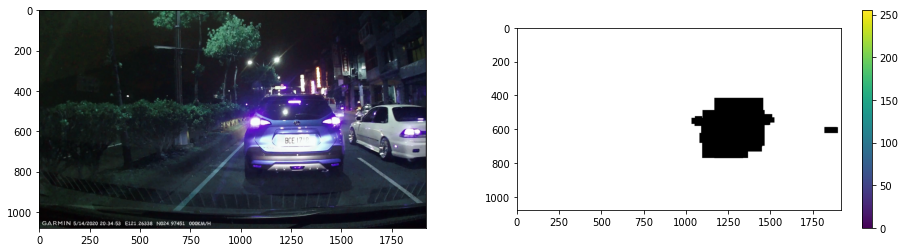

In [104]:
img = img.astype('uint8')
mask = mask.astype('uint8')

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.colorbar()

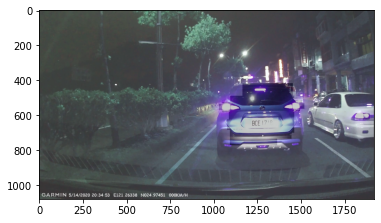

In [105]:
alpha = 0.8
beta = (1.0 - alpha)
dst = cv2.addWeighted(img, alpha, mask, beta, 0.0)
plt.imshow(dst)